# Hypothesis Testing

In [1]:
# development libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

# visual settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

# graphic style
plt.style.use("seaborn-v0_8")
sns.set_style("whitegrid")
sns.set_palette("Set1")

In [2]:
# importing the data
DATA_PROCESSED = '../data/processed/data_processed.csv'
df_processed = pd.read_csv(DATA_PROCESSED)

df_processed.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Has Promotion,Age Group,Gender Binary,Subscription Status Binary,Has Promotion Binary
0,1,55,Male,Blouse,Clothing,53.0000,Kentucky,L,Gray,Winter,3.1000,Yes,Credit Card,Express,14,Venmo,Fortnightly,Yes,Middle age (50-64),1,1,1
1,2,19,Male,Sweater,Clothing,64.0000,Maine,L,Maroon,Winter,3.1000,Yes,Bank Transfer,Express,2,Cash,Fortnightly,Yes,Young Adults (18-29),1,1,1
2,3,50,Male,Jeans,Clothing,73.0000,Massachusetts,S,Maroon,Spring,3.1000,Yes,Cash,Free Shipping,23,Credit Card,Weekly,Yes,Middle age (50-64),1,1,1
3,4,21,Male,Sandals,Footwear,90.0000,Rhode Island,M,Maroon,Spring,3.5000,Yes,PayPal,Next Day Air,49,PayPal,Weekly,Yes,Young Adults (18-29),1,1,1
4,5,45,Male,Blouse,Clothing,49.0000,Oregon,M,Turquoise,Spring,2.7000,Yes,Cash,Free Shipping,31,PayPal,Annually,Yes,Adults (30-49),1,1,1


### **1. Scenario:**  
Does the application of promotions (discounts or promotional codes) have a significant impact on the total amount customers spend per purchase? In other words, do customers who use promotions spend a different average amount than those who do not?

In [3]:
# separating the groups
group_1 = df_processed[df_processed['Has Promotion'] == 'Yes']['Purchase Amount (USD)']
group_2 = df_processed[df_processed['Has Promotion'] == 'No']['Purchase Amount (USD)']

print(f'First group, group that purchased with a promotion: {len(group_1)}')
print(f'Second group, group that purchased without promotion: {len(group_2)}')

First group, group that purchased with a promotion: 1677
Second group, group that purchased without promotion: 2223


In [4]:
print(f'Average for the group that purchased with a promotion: {group_1.mean():.2f}')
print(f'Average for the group that purchased without a promotion: {group_2.mean():.2f}')

Average for the group that purchased with a promotion: 59.28
Average for the group that purchased without a promotion: 60.13


In [5]:
print(f'Standard deviation for the group that purchased with a promotion: {group_1.std():.2f}')
print(f'Standard deviation for the group that purchased without a promotion: {group_2.std():.2f}')

Standard deviation for the group that purchased with a promotion: 23.61
Standard deviation for the group that purchased without a promotion: 23.74


### Normality Test

- Test sequence for the first group

In [6]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

alpha_global = 0.05

print('Shapiro-Wilk test:')

_, p_value_shapiro = stats.shapiro(group_1)

if p_value_shapiro <= alpha_global:
    print(f'We reject H0, the data does not follow a normal distribution.')
else:
    print(f'We do not reject H0; the data follow a normal distribution.')

Shapiro-Wilk test:
We reject H0, the data does not follow a normal distribution.


In [7]:
print('Kolmogorov-Smirnov test (KS)')

_, p_value_ks = stats.kstest(group_1, 'norm')

if p_value_ks <= alpha_global:
    print(f'We reject H0, the data are not normally distributed.')
else:
    print(f'We do not reject H0, the data are normally distributed.')

Kolmogorov-Smirnov test (KS)
We reject H0, the data are not normally distributed.


In [8]:
print('Lilliefors test')

_, p_value_lillie = lilliefors(group_1)

if p_value_lillie <= alpha_global:
    print(f'We reject H0, the data are not normally distributed.')
else:
    print(f'We do not reject H0, the data are normally distributed.')

Lilliefors test
We reject H0, the data are not normally distributed.


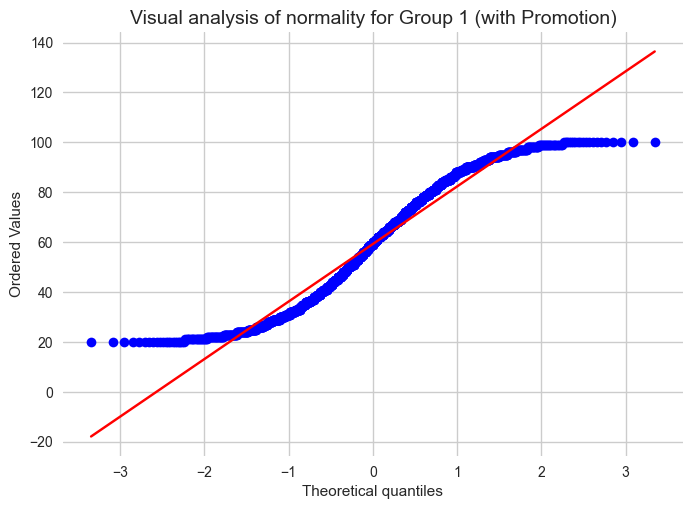

In [9]:
stats.probplot(group_1, dist='norm', plot=plt)
plt.title('Visual analysis of normality for Group 1 (with Promotion)', fontsize=14)
plt.show()

- Sequence of tests for group 2

In [10]:
print('Shapiro-Wilk test:')

_, p_value_shapiro = stats.shapiro(group_2)

if p_value_shapiro <= alpha_global:
    print(f'We reject H0, the data does not follow a normal distribution.')
else:
    print(f'We do not reject H0; the data follow a normal distribution.')

Shapiro-Wilk test:
We reject H0, the data does not follow a normal distribution.


In [11]:
print('Kolmogorov-Smirnov test (KS)')

_, p_value_ks = stats.kstest(group_2, 'norm')

if p_value_ks <= alpha_global:
    print(f'We reject H0, the data are not normally distributed.')
else:
    print(f'We do not reject H0, the data are normally distributed.')

Kolmogorov-Smirnov test (KS)
We reject H0, the data are not normally distributed.


In [12]:
print('Lilliefors test')

_, p_value_lillie = lilliefors(group_2)

if p_value_lillie <= alpha_global:
    print(f'We reject H0, the data are not normally distributed.')
else:
    print(f'We do not reject H0, the data are normally distributed.')

Lilliefors test
We reject H0, the data are not normally distributed.


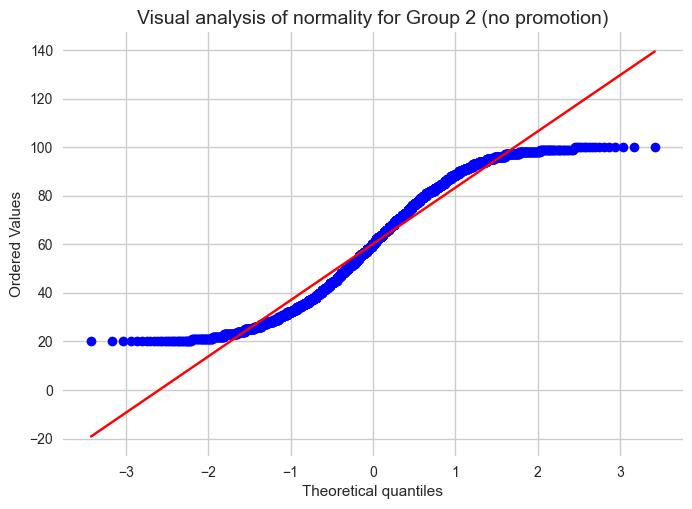

In [13]:
stats.probplot(group_2, dist='norm', plot=plt)
plt.title('Visual analysis of normality for Group 2 (no promotion)', fontsize=14)
plt.show()

### Homoscedasticity test

In [14]:
print("Levene's test for the two groups")
_, p_value_levene = stats.levene(group_1, group_2)

if p_value_levene < alpha_global:
    print(f"We reject H0. There is evidence of unequal variances.")
else:
    print(f"We do not reject H0. There is no evidence of unequal variances (we assume homoscedasticity)..")


Levene's test for the two groups
We do not reject H0. There is no evidence of unequal variances (we assume homoscedasticity)..


As can be seen, statistical tests and the QQ-Plot confirm that the distributions of the two groups, i.e., `group_1` with promotion and `group_2` without promotion, **do not follow a normal distribution**. This is common in real-world data, especially monetary values.


- **Interpretation of the Q-Q Plot in “S”:** The “S” shape you see, where the points are *below* the line in the lower tails and *above* the line in the upper tails (or vice versa), is characteristic of a distribution with **lighter tails (platicurtic)** than a normal distribution or, in some cases, may indicate a bimodal or multimodal pattern, where there are clusters at different points in the distribution. For purchase values, it is common to have this shape.

### The Important Point: The Importance of the Central Limit Theorem (CLT)

- **Central Limit Theorem (CLT):** For **large** samples (`group_1` of N=1677 and `group_2` N=2223 are very large), the Central Limit Theorem tells us that the sample distribution of the **mean** will be approximately normal, even if the underlying population of the raw data is not normal.

- **Robustness of Parametric Tests:** Due to this characteristic of CLT, many parametric tests, such as the **Student's t-test**, are robust to deviations from normality when sample sizes are large. The validity of the t-test depends more on the normality of the *sample distribution of the mean* than on the normality of the *distribution of the raw data*.

- **Options to consider:** To be even more cautious, we can use the **Welch's t-test**, which does not assume equal variances and is more robust when this assumption is violated, or even when it is satisfied, it performs well. We could use a nonparametric test such as the **Mann-Whitney U test**, which compares medians and does not assume normality. However, with large samples, Welch's t-test is reliable.


### Application of hypothesis testing

In [15]:
print("Application of Welch's t-test")
_, p_value_ttest = stats.ttest_ind(group_1, group_2, equal_var=False)

if p_value_ttest < alpha_global:
    print(f"We reject H0. There is significant evidence that the means of groups 1 and 2 are different.")
else:
    print(f"We do not reject H0. There is no significant evidence that the means of groups 1 and 2 are different.")

Application of Welch's t-test
We do not reject H0. There is no significant evidence that the means of groups 1 and 2 are different.


### **1. Interpretation of Welch's t-test results**

- **Statistically:** There is insufficient statistical evidence to claim that the mean value of `Purchase Amount (USD)` for promotional purchases is *different* from the mean value for non-promotional purchases.
- **In the business context:** The small difference observed in the averages ($59.28 with promotion vs. $60.13 without promotion) is so small that it can be attributed to chance rather than to a real effect of the promotion. In other words, we cannot conclude that promotions, as a whole, are causing customers to spend more (or less) per transaction.

### **2. Decisions for the Marketing/Business Department**

Given this interpretation, the marketing and sales department can make the following decisions:

- **Reevaluate the Purpose of Promotions:** If the main purpose of promotions is to **increase the average order value (AOV)**, then the current strategy **is not effective** for that purpose.
* **Focus on Other KPIs:** Promotions may be serving other purposes, such as:
    * **Customer Acquisition:** Attracting new customers to the platform.
    * **Customer Retention:** Encouraging existing customers to buy again.
    * **Inventory Turnover:** Selling specific products that are not moving.
    * **Increased Sales Volume:** More transactions, even if the value per transaction does not change.
If any of these are the goal, this test does not invalidate the effectiveness of promotions for *these other KPIs*.
* **Questioning Profitability:** If promotions imply a reduction in margin (discounts) and do not increase the purchase value, the business needs to question whether the cost of the promotion is justified.

### **3. Insights Generated**

1.  **Current Promotions Do Not Drive AOV:** The most direct insight is that current promotions do not have a significant effect on increasing the average amount a customer spends on a single purchase.
2.  **Need for Differentiation:** If the goal is to increase AOV, marketing needs to consider **different types of promotions** (e.g., “Buy X, Get Y,” “Free Shipping over $Z,” progressive discounts) or target these promotions to specific audiences.
3.  **Potential Savings:** The company may be spending resources on promotions that do not bring the expected return in terms of AOV. This opens the way to optimize the marketing budget.

### 2. Scenario
- Is there a significant interaction between the use of promotions and the customer's age group in terms of average purchase value?

In [16]:
df_processed[['Has Promotion', 'Age Group', 'Purchase Amount (USD)']].dtypes

Has Promotion             object
Age Group                 object
Purchase Amount (USD)    float64
dtype: object

In [17]:
df_processed_copy = df_processed.copy()

df_processed_copy['Has Promotion'] = df_processed_copy['Has Promotion'].astype('category')
df_processed_copy['Age Group'] = df_processed_copy['Age Group'].astype('category')

In [18]:
df_processed_copy[['Has Promotion', 'Age Group', 'Purchase Amount (USD)']].dtypes

Has Promotion            category
Age Group                category
Purchase Amount (USD)     float64
dtype: object

In [19]:
df_anova_two = df_processed_copy[['Purchase Amount (USD)', 'Has Promotion', 'Age Group']].copy()
df_anova_two.head()

,Purchase Amount (USD),Has Promotion,Age Group
0,53.0000,Yes,Middle age (50-64)
1,64.0000,Yes,Young Adults (18-29)
2,73.0000,Yes,Middle age (50-64)
3,90.0000,Yes,Young Adults (18-29)
4,49.0000,Yes,Adults (30-49)


In [20]:
print(df_anova_two['Has Promotion'].value_counts())
print()
print(df_anova_two['Age Group'].value_counts())

Has Promotion
No     2223
Yes    1677
Name: count, dtype: int64

Age Group
Adults (30-49)          1463
Middle age (50-64)      1132
Young Adults (18-29)     878
Seniors (65+)            427
Name: count, dtype: int64


### Normality

In [21]:
for promotion_status  in df_anova_two['Has Promotion'].unique():

    for age_group in df_anova_two['Age Group'].unique():

        combination = df_anova_two[
            (df_anova_two['Has Promotion'] == promotion_status )
            &
            (df_anova_two['Age Group'] == age_group)
        ]['Purchase Amount (USD)']
        
    
        print(f'For the “Has Promotion” column, value: {promotion_status }')
        print(f'The age group being: {age_group}')
        print(f'Distribution size: {combination.size}')
        print()


        print('Shapiro-Wilk Normality Test:')
        _, p_value_shapiro = stats.shapiro(combination)

        if p_value_shapiro <= alpha_global:
            print(f'We reject H0, the data does not follow a normal distribution.')
        else:
            print(f'We do not reject H0; the data follow a normal distribution.')
        print('==============================')

For the “Has Promotion” column, value: Yes
The age group being: Middle age (50-64)
Distribution size: 494

Shapiro-Wilk Normality Test:
We reject H0, the data does not follow a normal distribution.
For the “Has Promotion” column, value: Yes
The age group being: Young Adults (18-29)
Distribution size: 382

Shapiro-Wilk Normality Test:
We reject H0, the data does not follow a normal distribution.
For the “Has Promotion” column, value: Yes
The age group being: Adults (30-49)
Distribution size: 614

Shapiro-Wilk Normality Test:
We reject H0, the data does not follow a normal distribution.
For the “Has Promotion” column, value: Yes
The age group being: Seniors (65+)
Distribution size: 187

Shapiro-Wilk Normality Test:
We reject H0, the data does not follow a normal distribution.
For the “Has Promotion” column, value: No
The age group being: Middle age (50-64)
Distribution size: 638

Shapiro-Wilk Normality Test:
We reject H0, the data does not follow a normal distribution.
For the “Has Promo

### Homocedasticity

In [22]:
group_distributions = []

for promotion_status in df_anova_two['Has Promotion'].unique():

    for age_group in df_anova_two['Age Group'].unique():

        subset = df_anova_two[
            (df_anova_two['Has Promotion'] == promotion_status)
            &
            (df_anova_two['Age Group'] == age_group)
        ]['Purchase Amount (USD)']
        
        group_distributions.append(subset)


_, p_value_levene = stats.levene(*group_distributions)

print(f"Levene's Test for Homocedasticity")

if p_value_levene < alpha_global:
    print(f"We reject H0. The variances of the groups are NOT equal (heteroscedasticity).")
else:
    print(f"We do not reject H0. The variances of the groups ARE considered equal (homoscedasticity).")

Levene's Test for Homocedasticity
We do not reject H0. The variances of the groups ARE considered equal (homoscedasticity).


This means that there is no statistical evidence to suggest that variations in Purchase Value (USD) differ between the 8 groups formed by the combination of Promotion and Age Group.

### What this means for factorial ANOVA

1.  **Validation of the assumption:** Homoscedasticity (homogeneity of variations) is one of the main assumptions of ANOVA. The fact that we rejected the null hypothesis of Levene's test indicates that this assumption was met.
2.  **Robustness of results:** Since our groups are already large (which mitigates the problems of non-normality) and now the assumption of homoscedasticity has been met, the results of your **two-way ANOVA are considered robust and reliable**. There is no need to resort to more complex or non-parametric versions of ANOVA due to violations of these assumptions.

### Performing the Test ANOVA Two-Way with interaction

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Q("Purchase Amount (USD)") ~ C(Q("Has Promotion")) * C(Q("Age Group"))'

model = ols(formula, data=df_anova_two).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(f"Table ANOVA Two-Way")
anova_table

Table ANOVA Two-Way


,sum_sq,df,F,PR(>F)
"C(Q(""Has Promotion""))",711.1947,1.0000,1.2664,0.2605
"C(Q(""Age Group""))",599.4119,3.0000,0.3558,0.7850
"C(Q(""Has Promotion"")):C(Q(""Age Group""))",409.1129,3.0000,0.2428,0.8665
Residual,"2,185,629.0388","3,892.0000",NaN,NaN


In [24]:
p_value_interaction = anova_table['PR(>F)']['C(Q("Has Promotion")):C(Q("Age Group"))']
p_value_factor_promotion = anova_table['PR(>F)']['C(Q("Has Promotion"))']
p_value_factor_age = anova_table['PR(>F)']['C(Q("Age Group"))']

print(f'p_value for the Has Promotion factor: {p_value_factor_promotion}')
print(f'p-value for the Age Group factor: {p_value_factor_age}')
print(f'p_value for the interaction factor between Has Promotion and Age Group: {p_value_interaction}')

p_value for the Has Promotion factor: 0.26050484525831036
p-value for the Age Group factor: 0.7849545730749528
p_value for the interaction factor between Has Promotion and Age Group: 0.866470879378214


In [25]:
# Interaction Effect
if p_value_interaction < alpha_global:
    print('There is statistical evidence that the effect of promotions on the average purchase value depends on age group.')
    print('This means that the effect of promotions on sales depends on age group, or vice versa.')
else:
    print('We do not reject the null hypothesis of interaction, which means that there is no statistical evidence that the effect of promotions on the average purchase value depends on age group, or vice versa.')



# Main Effect of Promotion (interpret if interaction is NOT significant or with caution if it is)
if p_value_factor_promotion < alpha_global:
    print(f"The effect of the 'Has_Promotion' factor is statistically significant. (p={p_value_factor_promotion}).")
else:
    print(f"The effect of the 'Has_Promotion' factor is not statistically significant. (p={p_value_factor_promotion}).")



# Main Effect of Age Group (interpret if the interaction is NOT significant or with caution if it is)
if p_value_factor_age < alpha_global:
   print(f"The effect of the 'Age_Group' factor is statistically significant. (p={p_value_factor_age}).")
else:
    print(f"The effect of the 'Age_Group' factor is not statistically significant. (p={p_value_factor_age}).")


We do not reject the null hypothesis of interaction, which means that there is no statistical evidence that the effect of promotions on the average purchase value depends on age group, or vice versa.
The effect of the 'Has_Promotion' factor is not statistically significant. (p=0.26050484525831036).
The effect of the 'Age_Group' factor is not statistically significant. (p=0.7849545730749528).


### With the robustness of the ANOVA results confirmed, we can reaffirm the conclusions with even greater confidence:

- **Main Effect of Promotion (p-value: 0.2605):** There is no evidence that promotion alone affects the average purchase value.

- **Main Effect of Age Group (p-value: 0.7850):** There is no evidence that age group alone affects the average purchase value. 

- **Interaction Effect (p-value: 0.8665):** There is no evidence that the effect of the promotion on the purchase amount depends on age group, or vice versa.
In summary, the statistical analysis strongly indicates that, based on the available data, current promotions are not influencing the average purchase amount, and this scenario is consistent across all age groups.  

### 3. Scenario
- Does the average amount customers spend per purchase vary significantly between different product categories? Are there categories that naturally generate a higher or lower average spend per transaction?

In [26]:
df_processed_copy['Category'] = df_processed_copy['Category'].astype('category')
df_processed_copy['Category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3900 entries, 0 to 3899
Series name: Category
Non-Null Count  Dtype   
--------------  -----   
3900 non-null   category
dtypes: category(1)
memory usage: 4.1 KB


### Normality and Homoscedasticity Test

In [27]:
categorical_distributions = []

for categorical in df_processed_copy['Category'].unique():
    print(f'Product category: {categorical}')
    subset = df_processed_copy[df_processed_copy['Category'] == categorical]['Purchase Amount (USD)']
    categorical_distributions.append(subset)

    print(f'Distribution Size: {subset.size}')
    print()


    print('Shapiro-Wilk Normality Test:')
    _, p_value_shapiro = stats.shapiro(subset)

    if p_value_shapiro <= alpha_global:
        print(f'We reject H0, the data does not follow a normal distribution.')
    else:
        print(f'We do not reject H0; the data follow a normal distribution.')
    print()

    
_, p_value_levene = stats.levene(*categorical_distributions)

print(f"---- Levene's Test for Homocedasticity ----")

if p_value_levene < alpha_global:
    print(f"We reject H0. The variances of the groups are NOT equal (heteroscedasticity).")
else:
    print(f"We do not reject H0. The variances of the groups ARE considered equal (homoscedasticity).")

print('==============================')

Product category: Clothing
Distribution Size: 1737

Shapiro-Wilk Normality Test:
We reject H0, the data does not follow a normal distribution.

Product category: Footwear
Distribution Size: 599

Shapiro-Wilk Normality Test:
We reject H0, the data does not follow a normal distribution.

Product category: Outerwear
Distribution Size: 324

Shapiro-Wilk Normality Test:
We reject H0, the data does not follow a normal distribution.

Product category: Accessories
Distribution Size: 1240

Shapiro-Wilk Normality Test:
We reject H0, the data does not follow a normal distribution.

---- Levene's Test for Homocedasticity ----
We do not reject H0. The variances of the groups ARE considered equal (homoscedasticity).


### Implications:
- Despite non-normality in all groups, the **large sample sizes** and the **fulfillment of the homoscedasticity assumption** ensure that One-Way ANOVA is appropriate and robust for analyzing differences in `Purchase Amount (USD)` between `Product Categories`.

### Performing the One-Way ANOVA test

In [28]:
print(df_processed_copy.Category.unique())

['Clothing', 'Footwear', 'Outerwear', 'Accessories']
Categories (4, object): ['Accessories', 'Clothing', 'Footwear', 'Outerwear']


In [29]:
category_A = df_processed_copy[df_processed_copy['Category'] == 'Clothing']['Purchase Amount (USD)']
print('Category: Clothing')
print(f"Sample size: {category_A.size}\n")

category_B = df_processed_copy[df_processed_copy['Category'] == 'Footwear']['Purchase Amount (USD)']
print('Category: Footwear')
print(f"Sample size: {category_B.size}\n")

category_C = df_processed_copy[df_processed_copy['Category'] == 'Outerwear']['Purchase Amount (USD)']
print('Category: Outerwear')
print(f"Sample size: {category_C.size}\n")

category_D = df_processed_copy[df_processed_copy['Category'] == 'Accessories']['Purchase Amount (USD)']
print('Category: Accessories')
print(f"Sample size: {category_D.size}")


Category: Clothing
Sample size: 1737

Category: Footwear
Sample size: 599

Category: Outerwear
Sample size: 324

Category: Accessories
Sample size: 1240


In [30]:
_, p_value_anova_one = stats.f_oneway(category_A, category_B, category_C, category_D)

if p_value_anova_one < alpha_global:
    print(f"We conclude that there is statistical evidence that at least one of the average purchase values among the categories is significantly different from the others..")
else:
    print(f"We conclude that there is no statistical evidence of a significant difference in the average purchase values between the groups..")

We conclude that there is no statistical evidence of a significant difference in the average purchase values between the groups..


### **Analysis of the significance of the result for the business (with synthetic data context):**

The statistical conclusion remains the same: **there is no statistical evidence of a significant difference in the average purchase values between product categories in this specific dataset***.

**Interpretation with Context:**

1.  **“Surprising and Counterintuitive”:** The actual data would have this variation. The fact that the data was artificially generated by ChatGPT for practice **perfectly explains this lack of expected variation**. It is likely that the AI model that generated the data was not instructed to introduce significant differences in `Purchase Amount (USD)` based on `Category`, or simply did not “learn” them and replicated them naturally.

2.  **Uniformity in Average Spending – A Feature of This Synthetic Dataset:**
*   **For the (Real) Business:** If this were a real dataset, this uniformity would be a rare finding with profound implications.
    *   **For the Study Scenario (Synthetic):** In this case, uniformity in average spending is a characteristic of this *specific synthetic dataset*. We cannot generalize that “customers always spend similar amounts per transaction, regardless of category,” as this is a property of the generated data, not necessarily of actual consumer behavior.

3.  **Implications for Strategies (Adjusted for the Synthetic Context):**
    *   **Learning from Analysis, Not Necessarily from Actual Strategy:** The conclusions about “Marketing and Pricing” and “Promotions” are still valid *within the logic of this dataset*. In other words, if we were working *only with this data*, we would have no basis for creating differentiated strategies by category or age group to increase AOV.
    *   **Caution in Generalization:** For a real project, these results would be a warning sign to:
*   Question the quality or granularity of the data.
*   Verify that the sample is representative.
*   Explore additional variables that may have been omitted in the synthetic dataset but would be crucial in a real scenario.

### 4. Scenario
- Is there a significant association between customer gender and the product categories they purchase? In other words, is the distribution of purchases by category different for men and women?
    - **Why it matters:** Understanding whether there are category preferences by gender can help with targeted marketing strategies, inventory management, and the development of specific products for each audience.

In [31]:
# Converting the Gender column to categorical
df_processed_copy['Gender'] = df_processed_copy['Gender'].astype('category')
df_processed_copy['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object)

In [32]:
# Observed frequency of gender
df_processed_copy['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [33]:
# Frequencies Observed for Women in Relation to Product Categories
df_processed_copy[df_processed_copy['Gender'] == 'Female']['Category'].value_counts()

Category
Clothing       556
Accessories    392
Footwear       199
Outerwear      101
Name: count, dtype: int64

In [34]:
# Frequencies Observed for Men in Relation to Product Categories
df_processed_copy[df_processed_copy['Gender'] == 'Male']['Category'].value_counts()

Category
Clothing       1181
Accessories     848
Footwear        400
Outerwear       223
Name: count, dtype: int64

### Discrepancy in gender distribution and its implications:
- Considering that we have twice as many men in our collection, this could suggest that the Chi-Square Test could be invalid, but this is not true. Why?
    - The Chi-Square Test does not assume that sample sizes need to be proportional. It is designed to handle unbalanced samples.
- **How it does this:** It compares the **observed frequencies** (which are the counts we have from the contingency table, our actual values) with the **expected frequencies**. The expected frequencies are calculated based on the **marginal totals** (total men, total women, total for each category). If there were independence, the purchase proportions in each category should be the same for men and women, considering their total sizes.
    - **Statistical Power:** Since we have a large sample (3,900), this gives us a greater ability to detect a real association, if one exists.
    - **The Expected Frequency Rule:** The main assumption of the Chi-Square Test is: The Expected Frequencies in each cell of the contingency table should not be too small. A common rule is that less than 20% of cells should have an expected frequency less than 5, and no cell should have an expected frequency less than 1.

### Conclusion:
- Yes, the subsequent results of the Chi-Square Test will be adequate and statistically valid to verify the independence between Gender and Category, despite the imbalance in the gender sample. The test is robust for this situation.

In [35]:
# Creating the Contingency Table for the variables of interest
df_processed_copy_contingency_graphic = pd.crosstab(df_processed_copy['Gender'], df_processed_copy['Category'])
df_processed_copy_contingency_dataframe = pd.crosstab(df_processed_copy['Gender'], df_processed_copy['Category'], margins=True)

df_processed_copy_contingency_dataframe

Category,Accessories,Clothing,Footwear,Outerwear,All
Gender,,,,,
Female,392,556,199,101,1248
Male,848,1181,400,223,2652
All,1240,1737,599,324,3900


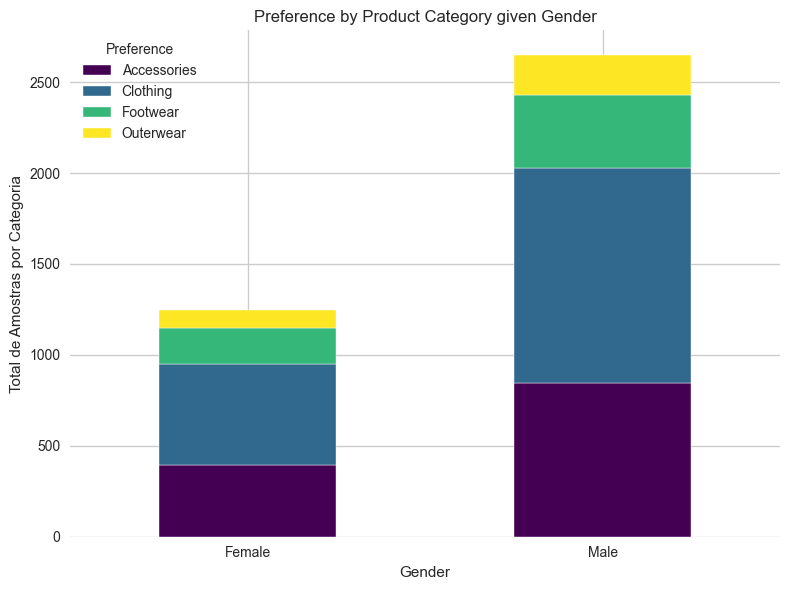

In [36]:
df_processed_copy_contingency_graphic.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Preference by Product Category given Gender')
plt.xlabel('Gender')
plt.ylabel('Total de Amostras por Categoria')
plt.xticks(rotation=0)
plt.legend(title='Preference')
plt.tight_layout()
plt.show()

In [37]:
chi2_statistic, p_value_chi2, degrees_f, expected_frequencies = stats.chi2_contingency(df_processed_copy_contingency_dataframe)

In [38]:
print(f'Chi-Square Test Results')
print(f'Chi-Square Statistic (X^2): {chi2_statistic:.3f}')
print(f'P-value: {p_value_chi2:.3f}')
print(f'Degrees of Freedom (degrees_f): {degrees_f}')

Chi-Square Test Results
Chi-Square Statistic (X^2): 0.598
P-value: 1.000
Degrees of Freedom (degrees_f): 8


In [39]:
expected_df = pd.DataFrame(expected_frequencies, index=df_processed_copy_contingency_dataframe.index, columns=df_processed_copy_contingency_dataframe.columns)

expected_df

Category,Accessories,Clothing,Footwear,Outerwear,All
Gender,,,,,
Female,396.8000,555.8400,191.6800,103.6800,"1,248.0000"
Male,843.2000,"1,181.1600",407.3200,220.3200,"2,652.0000"
All,"1,240.0000","1,737.0000",599.0000,324.0000,"3,900.0000"


### Verifying the assumptions of expected frequencies

In [40]:
min_expected = expected_frequencies.min()
cells_lt_5 = np.sum(expected_frequencies < 5)
total_cells = expected_frequencies.size

print(f'Assumption Check')
print(f'Lowest expected frequency: {min_expected:.2f}')
print(f'Number of cells with expected frequency < 5: {cells_lt_5} out of {total_cells}')
if min_expected >= 1 and (cells_lt_5 / total_cells) < 0.2:
    print('The expected frequency assumptions are met.')
else:
    print('WARNING: The expected frequency assumptions may have been violated. The results may not be reliable.')

Assumption Check
Lowest expected frequency: 103.68
Number of cells with expected frequency < 5: 0 out of 15
The expected frequency assumptions are met.


### Chi-Square Test Evaluation

In [41]:
if p_value_chi2 < alpha_global:
    print(f'Since P-value ({p_value_chi2:.3f}) < alpha_global ({alpha_global}), we reject the Null Hypothesis.')
    print(f'We conclude that there is a statistically significant association between Gender and Product Category Preference.')
    print(f'This means that Product Category Preference DEPENDS on gender.')
else:
    print(f'Since P-value ({p_value_chi2:.3f}) >= alpha_global ({alpha_global}), we do not reject the Null Hypothesis.')
    print(f'We conclude that there is insufficient statistical evidence to claim that there is an association between Gender and Product Category Preference.')
    print(f'This means that Product Category Preference is INDEPENDENT of gender, or the observed difference is due to chance.')

Since P-value (1.000) >= alpha_global (0.05), we do not reject the Null Hypothesis.
We conclude that there is insufficient statistical evidence to claim that there is an association between Gender and Product Category Preference.
This means that Product Category Preference is INDEPENDENT of gender, or the observed difference is due to chance.


### Analysis:
- **Appearance of Difference:** As stated earlier, “there appeared to be a difference” because of the imbalance between the gender counts. However, the Chi-Square Test of Independence does not compare absolute numbers directly. It compares **proportions** or **relative distributions**. It asks: “Is the proportion of women who buy ‘Clothing’ different from the proportion of men who buy ‘Clothing’, considering that there are more men in total?”

### Conclusion:
- **In practical terms:** Even with the gender imbalance in the sample, the proportional distribution of purchases across categories is roughly the same for men and women. The Chi-Square Test confirmed that any small differences observed can be attributed purely to chance and not to a real association between gender and product category.

**Connecting the result with the context of the synthetic dataset:**
- This result reinforces what was discussed earlier about the dataset being artificially generated by ChatGPT for practice purposes. It is very likely that the data generation algorithm was not instructed to create or was unable to replicate complex associations between variables, such as category preference by gender.

In a real dataset, it would be unusual to find such perfect independence between Gender and Product Category, where purchase proportions are almost identical.

### 5. Scenario
- Is there a correlation between a customer's number of previous purchases and their product review rating? Do more loyal customers tend to give higher (or lower) ratings?
    - **Why it matters:** It matters because it can reveal whether more loyal customers (with more purchases) are more or less satisfied, indicating the health of the customer relationship and perceived quality over time. This helps guide retention and product/service improvement strategies.

In [42]:
statistic_spearman, p_value_spearman = stats.spearmanr(df_processed_copy['Previous Purchases'], df_processed_copy['Review Rating'])
statistic_spearman, p_value_spearman

(np.float64(0.004438264035333068), np.float64(0.781717131148996))

In [43]:
if p_value_spearman < alpha_global:
    print(f'With p-value < {alpha_global}, we reject H0. There is significant statistical evidence of a monotonic association.')
    print(f"The direction of the association is {'positive' if statistic_spearman > 0 else 'negative'} and the strength is moderate/strong.")
else:
    print(f'  With p-value >= {alpha_global}, we do not reject H0. There is no significant statistical evidence of a monotonic association.')

  With p-value >= 0.05, we do not reject H0. There is no significant statistical evidence of a monotonic association.


### 6. Scenario
- Is there a statistically significant difference in the median Purchase Amount (USD) between different product categories?

    - **Why it matters (short answer):**
    Identifying whether the amount spent on purchases varies significantly between categories helps optimize pricing, target marketing campaigns, and understand which categories drive a higher average ticket or need strategies to increase it.

Starting Kruskal-Wallis H test to compare Purchase Amount between different Product Categories.

Categories found: Clothing, Footwear, Outerwear, Accessories
Median "Purchase Amount (USD)" by Category:
  Clothing: 60.00
  Footwear: 60.00
  Outerwear: 54.50
  Accessories: 60.00
--------------------------------------------------

Kruskal-Wallis H Test Results:
H statistic: 4.4112
P-value: 0.2203

With a p-value of 0.2203 (greater than or equal to 0.05), we do not reject H0.
We conclude that there is insufficient statistical evidence to claim that there is a significant difference in the median Purchase Amount between Product Categories.
The medians observed between categories are not significantly different.


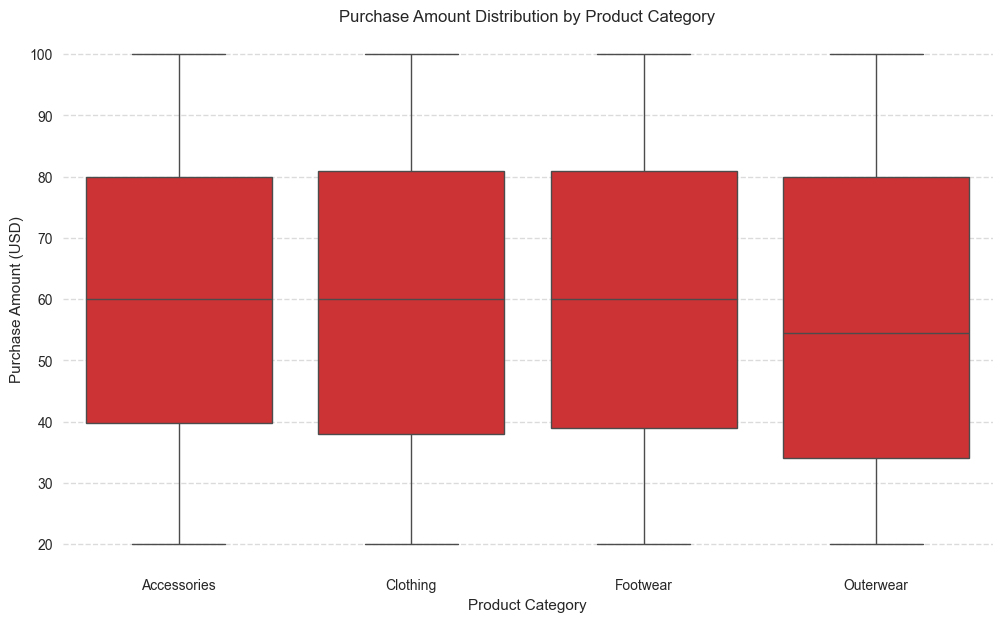

In [44]:
print('Starting Kruskal-Wallis H test to compare Purchase Amount between different Product Categories.')

# 1. Separate 'Purchase Amount (USD)' data by category
categories = df_processed_copy['Category'].unique()

data_by_category = [df_processed_copy[df_processed_copy['Category'] == cat]['Purchase Amount (USD)'] for cat in categories]

print(f"\nCategories found: {', '.join(categories)}")
print(f'Median "Purchase Amount (USD)" by Category:')
for cat, data in zip(categories, data_by_category):
    print(f'  {cat}: {data.median():.2f}')
print('-' * 50)

# 2. Run Kruskal-Wallis H Test
statistic_kruskal, p_value_kruskal = stats.kruskal(*data_by_category) # The asterisk unpacks the list of arrays

print('\nKruskal-Wallis H Test Results:')
print(f'H statistic: {statistic_kruskal:.4f}')
print(f'P-value: {p_value_kruskal:.4f}')

# 3. Interpret the Result
if p_value_kruskal < alpha_global:
    print(f'\nWith a p-value of {p_value_kruskal:.4f} (less than {alpha_global}), we reject H0.')
    print(f'We conclude that there is a statistically significant difference in the median Purchase Amount between at least two of the Product Categories.')
    print(f'This suggests that the purchase amount is not the same across all categories.')
else:
    print(f'\nWith a p-value of {p_value_kruskal:.4f} (greater than or equal to {alpha_global}), we do not reject H0.')
    print(f'We conclude that there is insufficient statistical evidence to claim that there is a significant difference in the median Purchase Amount between Product Categories.')
    print(f'The medians observed between categories are not significantly different.')

# 4. Distribution Visualization
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df_processed_copy)
plt.title('Purchase Amount Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Presentation of Results: Analysis of Customer Purchasing Behavior and Engagement**

Hello, everyone! My name is Zeygler, and today I will present the results of a series of statistical tests I conducted to better understand our customers' purchasing behavior and the impact of some key variables. Our goal is to transform data into actionable insights.

We used a significance level ($\alpha$) of **0.05** for all our analyses, which means that we consider a result to be statistically significant if the p-value is less than this threshold.

---

### **Scenario 1: The Impact of Promotions on Average Purchase Value**

*   **Business Question:** Do promotions (discounts or promotional codes) have a significant impact on the total amount customers spend per purchase? In other words, do customers who use promotions spend, on average, a different amount than those who do not?
* **Test Performed:** Welch's t-test, which is robust for comparing means of two groups with unequal variances.
* **Our Groups:** Customers who purchase “With Promotion” and customers who purchase “Without Promotion.”
* **Result:**
* After applying the test, **we do not reject the null hypothesis.**
* **Conclusion and Business Implication:**
    **There is no statistically significant evidence that the average purchase values between the “With Promotion” and “Without Promotion” groups are different.** This suggests that, although promotions may attract customers or encourage purchases, they are not, by themselves, significantly increasing the average spending per transaction in this dataset.

---

### **Scenario 2: Promotions, Age Groups, and Average Purchase Value: Is There Interaction?**

*   **Business Question:** Is there a significant interaction between the use of promotions and the customer's age group in terms of average purchase value?
*   **Test Performed:** Two-Way ANOVA.
*   **Variables:** Purchase Value (dependent), Use of Promotion, and Age Group (factors).
*   **Results:**
*   **We do not reject the null hypothesis of interaction.**
    * The effect of the ‘Has Promotion’ factor was not statistically significant (p-value = 0.26).
* The effect of the ‘Age Group’ factor was not statistically significant (p-value = 0.78).
* **Conclusion and Business Implication:**
    Our results indicate that **there is no statistical evidence that the effect of promotions on average purchase value depends on age group**, or vice versa. Furthermore, neither promotions nor age group alone demonstrated a significant impact on average purchase value. This suggests that, for this dataset, promotions and age are not the main drivers of value spent.

---

### **Scenario 3: Variation in Average Purchase Value Across Product Categories**

*   **Business Question:** Does the average amount customers spend per purchase vary significantly across different product categories? Are there categories that naturally generate a higher or lower average spend per transaction?
*   **Test Performed:** One-Way ANOVA.
*   **Variables:** Purchase Value (dependent), Product Category (factor with multiple categories such as Clothing, Footwear, Outerwear, Accessories).
*   **Result:**
*   After applying the test, **there is no statistical evidence of a significant difference in average purchase value between product categories.**
*   **Conclusion and Business Implication:**
    **We conclude that there is insufficient statistical evidence to claim that there is a significant difference in average purchase values between the various product categories.** This suggests that, regardless of category, customers tend to spend similar average amounts.

---

### **Scenario 4: Gender and Product Category Preference: An Association?**

*   **Business Question:** Is there a significant association between customer gender and the product categories they purchase? In other words, is the distribution of purchases by category different for men and women?
*   **Test Performed:** Chi-Square Test of Independence.
*   **Variables:** Gender and Product Category.
*   **Result:**
*   P-value: `1.000` (greater than or equal to $\alpha = 0.05$).
    * **We do not reject the null hypothesis.**
* **Conclusion and Business Implication:**
  **There is insufficient statistical evidence to claim that there is an association between Gender and Product Category Preference.** This means that preference for a category is **independent of gender**, or that any differences observed are due to chance. For our marketing, this suggests that gender-targeted campaigns for specific categories may not be the most effective method, as purchase proportions are very similar.

---

### **Scenario 5: Customer Loyalty and Product Rating: Is There a Correlation?**

*   **Business Question:** Is there a correlation between the number of previous purchases a customer has made and their product rating? Do more loyal customers tend to give higher (or lower) ratings?
*   **Test Performed:** Spearman's correlation coefficient (nonparametric test).
*   **Variables:** Previous Purchases and Product Rating.
*   **Result:**
*   P-value: `0.7817` (greater than or equal to $\alpha = 0.05$).
    * **We do not reject the null hypothesis.**
* **Conclusion and Business Implication:**
    **There is no statistically significant evidence of a monotonic association between the number of Previous Purchases and Product Rating.** This tells us that the number of purchases a customer has made in the past does not seem to have a direct and consistent relationship with their satisfaction expressed in product reviews. Customer satisfaction may be driven by other factors.

---

### **Scenario 6: Difference in Purchase Amount Medians between Product Categories (Nonparametric Test)**

*   **Business Question:** Is there a statistically significant difference in the median `Purchase Amount (USD)` between different product categories (`Category`)?
*   **Test Performed:** Kruskal-Wallis H test (nonparametric alternative to ANOVA).
*   **Variables:** Median Purchase Amount (dependent), Product Category (factor).
*   **Observed Medians:**
*   Clothing: $60.00
    * Footwear: $60.00
* Outerwear: $54.50
* Accessories: $60.00
* **Result:**
* P-value: `0.2203` (greater than or equal to $\alpha = 0.05$).
    * **We do not reject the null hypothesis.**
* **Conclusion and Business Implication:**
    **There is insufficient statistical evidence to claim that there is a significant difference in the median Purchase Value between Product Categories.** The observed medians are very close, and the test confirms that any small variation is not statistically robust. This reinforces the idea that, in this dataset, median spending is quite consistent across categories.

---

### **General Summary and Final Considerations**

Through these six scenarios, we explored various facets of customer behavior. Interestingly, for this data set, most of our analyses led to **non-rejection of the null hypotheses**. This suggests that:

*   **Promotions**, while important for engagement, **do not significantly alter the average purchase value** or interact with the age group in a noticeable way in relation to spending.
*   **Product categories do not show significant differences** in average or median purchase value.
*   **Gender does not influence category preference**, and **previous purchase frequency does not correlate** significantly with product ratings.

It is crucial to remember that these results are specific to the analyzed dataset, which, as we know, is synthetic. In a scenario with real data, we would expect to see more significant associations and differences. However, the process of applying and interpreting these tests is fundamental for any data scientist.

### **Suggested Next Steps:**

1.  **Exploration of Other Variables:** We could investigate other variables present in the dataset that may not have been tested, looking for new relationships.
2.  **In-Depth Visualizations:** Create more interactive graphics to explore data distributions and identify visual patterns that may suggest new hypotheses, even if not captured by specific statistical tests.
3.  **Qualitative Analysis:** Complement with a qualitative analysis, if textual data (such as review comments) were available, to understand the “why” behind the patterns or lack thereof.
4.  **Additional Data Collection:** Consider the need for additional or more detailed data to validate or refute these conclusions in a real business context.

Thank you for your attention, and I am open to questions!